In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка и первичный анализ данных

In [3]:
data = pd.read_csv('winemag-data-130k-v2.csv')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
data.shape

(129971, 14)

In [5]:
data.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
dtype: object

In [6]:
data.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 129971


# 1. Обработка пропусков в данных

# 1.1. Простые стратегии - удаление или заполнение нулями

In [8]:
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((129971, 14), (129971, 5))

In [9]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((129971, 14), (22387, 14))

# 1.2. "Внедрение значений" - импьютация (imputation)

# 1.2.1. Обработка пропусков в числовых данных

In [10]:
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка price. Тип данных float64. Количество пустых значений 8996, 6.92%.


In [11]:
data_num = data[num_cols]
data_num

,price
0,NaN
1,15.0
2,14.0
3,13.0
4,65.0
5,15.0
6,16.0
7,24.0
8,12.0
9,27.0


In [12]:
data[data['price'].isnull()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
30,30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
31,31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta
50,50,Italy,This blend of Nero d'Avola and Syrah opens wit...,Scialo,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Viticultori Associati Canicatti 2008 Scialo Re...,Red Blend,Viticultori Associati Canicatti
54,54,Italy,"A blend of Nero d'Avola and Nerello Mascalese,...",Rosso,85,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Corvo 2010 Rosso Red (Sicilia),Red Blend,Corvo
79,79,Portugal,"Grown on the sandy soil of Tejo, the wine is t...",Bridão,86,NaN,Tejo,NaN,NaN,Roger Voss,@vossroger,Adega Cooperativa do Cartaxo 2014 Bridão Touri...,Touriga Nacional,Adega Cooperativa do Cartaxo
137,137,South Africa,"This is great Chenin Blanc, wood fermented but...",Hope Marguerite,90,NaN,Walker Bay,NaN,NaN,Roger Voss,@vossroger,Beaumont 2005 Hope Marguerite Chenin Blanc (Wa...,Chenin Blanc,Beaumont
159,159,Italy,"Intense aromas of ripe red berry, menthol, esp...",Filo di Seta,91,NaN,Tuscany,Brunello di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,Castello Romitorio 2011 Filo di Seta (Brunell...,Sangiovese,Castello Romitorio


In [13]:
flt_index = data[data['price'].isnull()].index
flt_index

Int64Index([     0,     13,     30,     31,     32,     50,     54,     79,
               137,    159,
            ...
            129764, 129787, 129794, 129807, 129813, 129844, 129860, 129863,
            129893, 129964],
           dtype='int64', length=8996)

In [14]:
data[data.index.isin(flt_index)]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
30,30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
31,31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta
50,50,Italy,This blend of Nero d'Avola and Syrah opens wit...,Scialo,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Viticultori Associati Canicatti 2008 Scialo Re...,Red Blend,Viticultori Associati Canicatti
54,54,Italy,"A blend of Nero d'Avola and Nerello Mascalese,...",Rosso,85,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Corvo 2010 Rosso Red (Sicilia),Red Blend,Corvo
79,79,Portugal,"Grown on the sandy soil of Tejo, the wine is t...",Bridão,86,NaN,Tejo,NaN,NaN,Roger Voss,@vossroger,Adega Cooperativa do Cartaxo 2014 Bridão Touri...,Touriga Nacional,Adega Cooperativa do Cartaxo
137,137,South Africa,"This is great Chenin Blanc, wood fermented but...",Hope Marguerite,90,NaN,Walker Bay,NaN,NaN,Roger Voss,@vossroger,Beaumont 2005 Hope Marguerite Chenin Blanc (Wa...,Chenin Blanc,Beaumont
159,159,Italy,"Intense aromas of ripe red berry, menthol, esp...",Filo di Seta,91,NaN,Tuscany,Brunello di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,Castello Romitorio 2011 Filo di Seta (Brunell...,Sangiovese,Castello Romitorio


In [15]:
data_num[data_num.index.isin(flt_index)]['price']

0        NaN
13       NaN
30       NaN
31       NaN
32       NaN
50       NaN
54       NaN
79       NaN
137      NaN
159      NaN
163      NaN
182      NaN
194      NaN
200      NaN
222      NaN
223      NaN
285      NaN
288      NaN
290      NaN
291      NaN
299      NaN
302      NaN
304      NaN
313      NaN
316      NaN
317      NaN
377      NaN
395      NaN
417      NaN
418      NaN
          ..
129371   NaN
129383   NaN
129384   NaN
129387   NaN
129388   NaN
129395   NaN
129432   NaN
129469   NaN
129488   NaN
129512   NaN
129519   NaN
129525   NaN
129552   NaN
129610   NaN
129638   NaN
129684   NaN
129696   NaN
129721   NaN
129758   NaN
129759   NaN
129764   NaN
129787   NaN
129794   NaN
129807   NaN
129813   NaN
129844   NaN
129860   NaN
129863   NaN
129893   NaN
129964   NaN
Name: price, Length: 8996, dtype: float64

In [16]:
data_num_price = data_num[['price']]
data_num_price.head()

,price
0,NaN
1,15.0
2,14.0
3,13.0
4,65.0


In [17]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [18]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_price)
mask_missing_values_only

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [19]:
strategies=['mean', 'median','most_frequent']

In [20]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_price)
    return data_num_imp[mask_missing_values_only]

In [21]:
strategies[0], test_num_impute(strategies[0])

('mean', array([35.36338913, 35.36338913, 35.36338913, ..., 35.36338913,
        35.36338913, 35.36338913]))

In [22]:
strategies[1], test_num_impute(strategies[1])

('median', array([25., 25., 25., ..., 25., 25., 25.]))

In [23]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([20., 20., 20., ..., 20., 20., 20.]))

In [24]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [25]:
test_num_impute_col(data, 'price', strategies[1])

('price', 'median', 8996, 25.0, 25.0)

# 1.2.2. Обработка пропусков в категориальных данных

In [26]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 4)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка country. Тип данных object. Количество пустых значений 63, 0.0485%.
Колонка designation. Тип данных object. Количество пустых значений 37465, 28.8257%.
Колонка province. Тип данных object. Количество пустых значений 63, 0.0485%.
Колонка region_1. Тип данных object. Количество пустых значений 21247, 16.3475%.
Колонка region_2. Тип данных object. Количество пустых значений 79460, 61.1367%.
Колонка taster_name. Тип данных object. Количество пустых значений 26244, 20.1922%.
Колонка taster_twitter_handle. Тип данных object. Количество пустых значений 31213, 24.0154%.
Колонка variety. Тип данных object. Количество пустых значений 1, 0.0008%.


In [27]:
cat_temp_data = data[['country']]
cat_temp_data.head()

,country
0,Italy
1,Portugal
2,US
3,US
4,US


In [28]:
cat_temp_data['country'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

In [29]:
cat_temp_data[cat_temp_data['country'].isnull()].shape

(63, 1)

In [30]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Italy'],
       ['Portugal'],
       ['US'],
       ...,
       ['France'],
       ['France'],
       ['France']], dtype=object)

In [31]:
np.unique(data_imp2)

array(['Argentina', 'Armenia', 'Australia', 'Austria',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'China', 'Croatia', 'Cyprus', 'Czech Republic', 'Egypt', 'England',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India',
       'Israel', 'Italy', 'Lebanon', 'Luxembourg', 'Macedonia', 'Mexico',
       'Moldova', 'Morocco', 'New Zealand', 'Peru', 'Portugal', 'Romania',
       'Serbia', 'Slovakia', 'Slovenia', 'South Africa', 'Spain',
       'Switzerland', 'Turkey', 'US', 'Ukraine', 'Uruguay'], dtype=object)

In [32]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Italy'],
       ['Portugal'],
       ['US'],
       ...,
       ['France'],
       ['France'],
       ['France']], dtype=object)

In [33]:
np.unique(data_imp3)

array(['!!!', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'China', 'Croatia', 'Cyprus', 'Czech Republic', 'Egypt', 'England',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India',
       'Israel', 'Italy', 'Lebanon', 'Luxembourg', 'Macedonia', 'Mexico',
       'Moldova', 'Morocco', 'New Zealand', 'Peru', 'Portugal', 'Romania',
       'Serbia', 'Slovakia', 'Slovenia', 'South Africa', 'Spain',
       'Switzerland', 'Turkey', 'US', 'Ukraine', 'Uruguay'], dtype=object)

In [34]:
data_imp3[data_imp3=='!!!'].size

63

# 2. Преобразование категориальных признаков в числовые

In [35]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Italy
1,Portugal
2,US
3,US
4,US
5,Spain
6,Italy
7,France
8,Germany
9,France


# 2.1. Кодирование категорий целочисленными значениями - label encoding

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [37]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [38]:
cat_enc['c1'].unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', 'Turkey', 'Czech Republic', 'Slovenia', 'Luxembourg',
       'Croatia', 'Georgia', 'Uruguay', 'England', 'Lebanon', 'Serbia',
       'Brazil', 'Moldova', 'Morocco', 'Peru', 'India', 'Bulgaria',
       'Cyprus', 'Armenia', 'Switzerland', 'Bosnia and Herzegovina',
       'Ukraine', 'Slovakia', 'Macedonia', 'China', 'Egypt'], dtype=object)

In [39]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

In [40]:
le.inverse_transform([0, 1, 2, 3, 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

array(['Argentina', 'Armenia', 'Australia', 'Austria',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile',
       'China', 'Croatia', 'Cyprus', 'Czech Republic', 'Egypt', 'England',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India',
       'Israel', 'Italy', 'Lebanon', 'Luxembourg', 'Macedonia', 'Mexico',
       'Moldova', 'Morocco', 'New Zealand', 'Peru', 'Portugal', 'Romania',
       'Serbia', 'Slovakia', 'Slovenia', 'South Africa', 'Spain',
       'Switzerland', 'Turkey', 'US', 'Ukraine', 'Uruguay'], dtype=object)

# 2.2. Кодирование категорий наборами бинарных значений - one-hot encoding

In [41]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [42]:
cat_enc.shape

(129971, 1)

In [43]:
cat_enc_ohe.shape

(129971, 43)

In [44]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],


In [45]:
cat_enc.head(10)

,c1
0,Italy
1,Portugal
2,US
3,US
4,US
5,Spain
6,Italy
7,France
8,Germany
9,France


# 2.3. Pandas get_dummies - быстрый вариант one-hot кодирования

In [46]:
pd.get_dummies(cat_enc).head()

,c1_Argentina,c1_Armenia,c1_Australia,c1_Austria,c1_Bosnia and Herzegovina,c1_Brazil,c1_Bulgaria,c1_Canada,c1_Chile,c1_China,...,c1_Serbia,c1_Slovakia,c1_Slovenia,c1_South Africa,c1_Spain,c1_Switzerland,c1_Turkey,c1_US,c1_Ukraine,c1_Uruguay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Canada,country_Chile,country_China,...,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Switzerland,country_Turkey,country_US,country_Ukraine,country_Uruguay,country_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# 3. Масштабирование данных

In [48]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# 3.1. MinMax масштабирование

In [49]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_new_2[['price']])

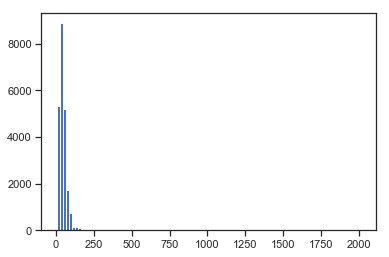

In [50]:
plt.hist(data_new_2['price'], 100)
plt.show()

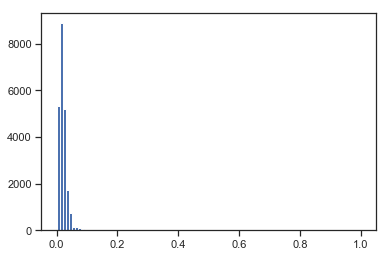

In [51]:
plt.hist(sc1_data, 100)
plt.show()

# 3.2. Масштабирование данных на основе Z-оценки - StandardScaler

In [52]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data_new_2[['price']])

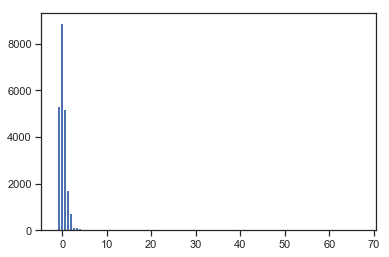

In [53]:
plt.hist(sc2_data, 100)
plt.show()

# 3.3. Нормализация данных

In [54]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data_new_2[['price']])

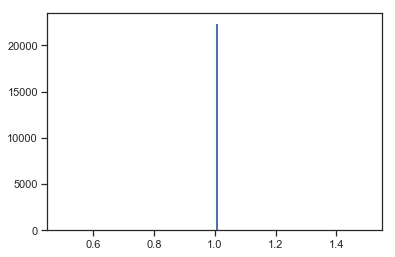

In [55]:
plt.hist(sc3_data, 100)
plt.show()

In [56]:
data.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64